In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [115]:
print("Wczytanie danych")
first_wine_data = pd.read_csv('./winemag-data_first150k.csv', index_col=0)
second_wine_data = pd.read_csv('./winemag-data-130k-v2.csv', index_col=0)
wine_data = pd.concat([first_wine_data, second_wine_data])
wine_data.head()

Wczytanie danych


,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [116]:
print("Liczba wszystkich rekordów:",wine_data.shape[0], end="\n\n")

print("Liczba rekordów bez podanego kraju pochodzenia:",wine_data[wine_data['country'].isnull()].shape[0])
print("Liczba rekordów bez podanego opisu:",wine_data[wine_data['description'].isnull()].shape[0])
print("Liczba rekordów bez podanego przeznaczenia:",wine_data[wine_data['designation'].isnull()].shape[0])
# description jest do wyrzucenia, ponieważ jest bardzo mała szansa by nie bylo unique
print("Liczba rekordów bez podanej liczby punktów:",wine_data[wine_data['points'].isnull()].shape[0])
print("Liczba rekordów bez podanej ceny:",wine_data[wine_data['price'].isnull()].shape[0])
print("Liczba rekordów bez podanej prowincji:",wine_data[wine_data['province'].isnull()].shape[0])
print("Liczba rekordów bez podanego regionu 1:",wine_data[wine_data['region_1'].isnull()].shape[0])
print("Liczba rekordów bez podanego regionu 2:",wine_data[wine_data['region_2'].isnull()].shape[0])
print("Liczba rekordów bez podanej odmiany:",wine_data[wine_data['variety'].isnull()].shape[0])
print("Liczba rekordów bez podanej winiarni:",wine_data[wine_data['winery'].isnull()].shape[0])

Liczba wszystkich rekordów: 280901

Liczba rekordów bez podanego kraju pochodzenia: 68
Liczba rekordów bez podanego opisu: 0
Liczba rekordów bez podanego przeznaczenia: 83200
Liczba rekordów bez podanej liczby punktów: 0
Liczba rekordów bez podanej ceny: 22691
Liczba rekordów bez podanej prowincji: 68
Liczba rekordów bez podanego regionu 1: 46307
Liczba rekordów bez podanego regionu 2: 169437
Liczba rekordów bez podanej odmiany: 1
Liczba rekordów bez podanej winiarni: 0


In [117]:
print("Ilość rekordów dla poszczególnych liczb punktów:",wine_data['points'].value_counts())
print("Najmniejsza liczba przyznanych punktów:",wine_data['points'].min())
print("Największa liczba przyznanych punktów:",wine_data['points'].max())

Ilość rekordów dla poszczególnych liczb punktów: 87     37680
88     35078
90     31383
86     28173
89     25147
85     21941
91     21895
92     18854
84     17188
93     12506
83      9073
94      7220
82      5877
95      3251
81      2194
80      1295
96      1218
97       594
98       208
99        83
100       43
Name: points, dtype: int64
Najmniejsza liczba przyznanych punktów: 80
Największa liczba przyznanych punktów: 100


In [118]:
# wyrzucenie niepotrzebnych kolumn z datasetu
wine_data = wine_data.drop(columns=["taster_name","taster_twitter_handle","title", "region_2", "designation", "description"])
wine_data

,country,points,price,province,region_1,variety,winery
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,90,75.0,Oregon,Oregon,Pinot Noir,Citation
129968,France,90,30.0,Alsace,Alsace,Gewürztraminer,Domaine Gresser
129969,France,90,32.0,Alsace,Alsace,Pinot Gris,Domaine Marcel Deiss


In [119]:
# wyrzucenie wierszy z nieuzupełnionymi danymi
wine_data = wine_data[wine_data['country'].notnull()]
wine_data = wine_data[wine_data['price'].notnull()]
wine_data = wine_data[wine_data['region_1'].notnull()]
wine_data = wine_data[wine_data['province'].notnull()]
wine_data = wine_data[wine_data['variety'].notnull()]
wine_data

,country,points,price,province,region_1,variety,winery
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...
129965,France,90,28.0,Alsace,Alsace,Pinot Gris,Domaine Rieflé-Landmann
129967,US,90,75.0,Oregon,Oregon,Pinot Noir,Citation
129968,France,90,30.0,Alsace,Alsace,Gewürztraminer,Domaine Gresser
129969,France,90,32.0,Alsace,Alsace,Pinot Gris,Domaine Marcel Deiss


In [0]:
# zmiana nazwy kolumny region_1 na region
wine_data = wine_data.rename(columns={"region_1":"region"})

In [0]:
# usuniecie duplikatów
wine_data = wine_data.drop_duplicates()

In [122]:
print(wine_data.shape)

(121857, 7)


In [123]:
print("Liczba wszystkich rekordów:",wine_data.shape[0], end="\n\n")

print("Liczba rekordów bez podanego kraju pochodzenia:",wine_data[wine_data['country'].isnull()].shape[0])
print("Liczba rekordów bez podanej liczby punktów:",wine_data[wine_data['points'].isnull()].shape[0])
print("Liczba rekordów bez podanej ceny:",wine_data[wine_data['price'].isnull()].shape[0])
print("Liczba rekordów bez podanej prowincji:",wine_data[wine_data['province'].isnull()].shape[0])
print("Liczba rekordów bez podanego regionu:",wine_data[wine_data['region'].isnull()].shape[0])
print("Liczba rekordów bez podanej odmiany:",wine_data[wine_data['variety'].isnull()].shape[0])
print("Liczba rekordów bez podanej winiarni:",wine_data[wine_data['winery'].isnull()].shape[0])

Liczba wszystkich rekordów: 121857

Liczba rekordów bez podanego kraju pochodzenia: 0
Liczba rekordów bez podanej liczby punktów: 0
Liczba rekordów bez podanej ceny: 0
Liczba rekordów bez podanej prowincji: 0
Liczba rekordów bez podanego regionu: 0
Liczba rekordów bez podanej odmiany: 0
Liczba rekordów bez podanej winiarni: 0


In [124]:
#wine_data = wine_data.drop(columns=["price"])

wine_data = wine_data.drop_duplicates()
wine_data

,country,points,price,province,region,variety,winery
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...
129962,Italy,90,40.0,Sicily & Sardinia,Sicilia,Nero d'Avola,Cusumano
129965,France,90,28.0,Alsace,Alsace,Pinot Gris,Domaine Rieflé-Landmann
129967,US,90,75.0,Oregon,Oregon,Pinot Noir,Citation
129969,France,90,32.0,Alsace,Alsace,Pinot Gris,Domaine Marcel Deiss


In [125]:
# przenumerowanie kolumny "country"
dict_country = {'Argentina': 0, 'Australia': 1, 'Canada': 2, 'France': 3, 'Italy': 4, 'Spain': 5, 'US': 6}
print(dict_country)
wine_data['country'] = wine_data['country'].replace(dict_country)
wine_data

{'Argentina': 0, 'Australia': 1, 'Canada': 2, 'France': 3, 'Italy': 4, 'Spain': 5, 'US': 6}


,country,points,price,province,region,variety,winery
0,6,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,5,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,6,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,6,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,3,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...
129962,4,90,40.0,Sicily & Sardinia,Sicilia,Nero d'Avola,Cusumano
129965,3,90,28.0,Alsace,Alsace,Pinot Gris,Domaine Rieflé-Landmann
129967,6,90,75.0,Oregon,Oregon,Pinot Noir,Citation
129969,3,90,32.0,Alsace,Alsace,Pinot Gris,Domaine Marcel Deiss


In [126]:
# przenumerowanie kolumny "province"
x_province = wine_data.groupby('province')["price"].mean()
dict_province = dict(pd.cut(x_province,10,labels=range(10)))
print(dict_province)
wine_data['province'] = wine_data['province'].replace(dict_province)
wine_data

{'Alsace': 2, 'Andalucia': 3, 'Arizona': 2, 'Australia Other': 0, 'Beaujolais': 1, 'Bordeaux': 3, 'British Columbia': 3, 'Burgundy': 8, 'California': 3, 'Canada Other': 3, 'Catalonia': 2, 'Central Italy': 1, 'Central Spain': 0, 'Champagne': 9, 'Colorado': 2, 'Connecticut': 0, 'France Other': 0, 'Galicia': 1, 'Hawaii': 2, 'Idaho': 0, 'Illinois': 2, 'Iowa': 0, 'Italy Other': 2, 'Kentucky': 2, 'Languedoc-Roussillon': 1, 'Levante': 1, 'Loire Valley': 2, 'Lombardy': 3, 'Massachusetts': 1, 'Mendoza Province': 1, 'Michigan': 2, 'Missouri': 1, 'Nevada': 4, 'New Jersey': 1, 'New Mexico': 1, 'New South Wales': 1, 'New York': 1, 'North Carolina': 1, 'Northeastern Italy': 2, 'Northern Spain': 2, 'Northwestern Italy': 1, 'Ohio': 0, 'Ontario': 3, 'Oregon': 3, 'Other': 1, 'Pennsylvania': 1, 'Piedmont': 5, 'Provence': 1, 'Queensland': 0, 'Rhode Island': 1, 'Rhône Valley': 4, 'Sicily & Sardinia': 2, 'South Australia': 3, 'Southern Italy': 2, 'Southwest France': 1, 'Spain Other': 1, 'Spanish Islands': 3

,country,points,price,province,region,variety,winery
0,6,96,235.0,3,Napa Valley,Cabernet Sauvignon,Heitz
1,5,96,110.0,2,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,6,96,90.0,3,Knights Valley,Sauvignon Blanc,Macauley
3,6,96,65.0,3,Willamette Valley,Pinot Noir,Ponzi
4,3,95,66.0,1,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...
129962,4,90,40.0,2,Sicilia,Nero d'Avola,Cusumano
129965,3,90,28.0,2,Alsace,Pinot Gris,Domaine Rieflé-Landmann
129967,6,90,75.0,3,Oregon,Pinot Noir,Citation
129969,3,90,32.0,2,Alsace,Pinot Gris,Domaine Marcel Deiss


In [127]:
# przenumerowanie kolumny "region"
x_region = wine_data.groupby('region')["price"].mean()
print(x_region)
dict_region = dict(pd.cut(x_region,600,labels=range(600)))
print(dict_region)
wine_data['region'] = wine_data['region'].replace(dict_region)
wine_data

region
Abruzzo                28.333333
Adelaida District      52.040404
Adelaide               20.586207
Adelaide Hills         21.875000
Adelaide Plains        13.750000
                         ...    
Yolo County            20.354167
York Mountain          36.722222
Yorkville Highlands    35.505495
Yountville             60.651786
Zonda Valley           15.666667
Name: price, Length: 1307, dtype: float64
{'Abruzzo': 7, 'Adelaida District': 15, 'Adelaide': 5, 'Adelaide Hills': 5, 'Adelaide Plains': 2, "Aglianico d'Irpinia": 2, 'Aglianico del Beneventano': 8, 'Aglianico del Taburno': 10, 'Aglianico del Vulture': 8, 'Agrelo': 7, 'Albana di Romagna': 8, 'Albemarle County': 10, 'Alcamo': 4, "Aleatico dell'Elba": 12, 'Alella': 5, 'Alexander Valley': 10, 'Alghero': 11, 'Alicante': 5, 'Alicante-Marina Alta': 4, 'Almansa': 2, 'Aloxe-Corton': 17, 'Alpilles': 7, 'Alpine Valleys': 1, 'Alsace': 8, 'Alta Langa': 10, 'Alta Mesa': 4, 'Alta Valle della Greve': 20, 'Alto Adige': 7, 'Alto Adige Terla

,country,points,price,province,region,variety,winery
0,6,96,235.0,3,15,Cabernet Sauvignon,Heitz
1,5,96,110.0,2,11,Tinta de Toro,Bodega Carmen Rodríguez
2,6,96,90.0,3,12,Sauvignon Blanc,Macauley
3,6,96,65.0,3,9,Pinot Noir,Ponzi
4,3,95,66.0,1,8,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...
129962,4,90,40.0,2,6,Nero d'Avola,Cusumano
129965,3,90,28.0,2,8,Pinot Gris,Domaine Rieflé-Landmann
129967,6,90,75.0,3,6,Pinot Noir,Citation
129969,3,90,32.0,2,8,Pinot Gris,Domaine Marcel Deiss


In [128]:
# przenumerowanie kolumny "variety"
x_variety = wine_data.groupby('variety')["price"].mean()
print(x_variety)
dict_variety = dict(pd.cut(x_variety,300,labels=range(300)))
print(dict_variety)
wine_data['variety'] = wine_data['variety'].replace(dict_variety)
wine_data

variety
Abouriou          35.000000
Aglianico         37.005747
Airen              9.000000
Albana            25.875000
Albanello         20.000000
                    ...    
White Riesling    19.629630
Xarel-lo          19.714286
Zibibbo           38.240000
Zinfandel         28.168913
Zweigelt          26.666667
Name: price, Length: 542, dtype: float64
{'Abouriou': 54, 'Aglianico': 58, 'Airen': 2, 'Albana': 36, 'Albanello': 24, 'Albariño': 26, 'Albarossa': 63, 'Albarín': 14, 'Aleatico': 62, 'Alicante': 29, 'Alicante Bouschet': 37, 'Aligoté': 21, 'Alsace white blend': 50, 'Altesse': 20, 'Alvarelhão': 20, 'Alvarinho': 22, 'Angevine': 10, 'Ansonica': 31, 'Apple': 46, 'Arneis': 26, 'Asprinio': 14, 'Auxerrois': 29, 'Baco Noir': 36, 'Barbera': 36, 'Barbera-Nebbiolo': 44, 'Biancale': 20, 'Biancolella': 36, 'Black Monukka': 34, 'Black Muscat': 31, 'Blanc du Bois': 38, 'Blaufränkisch': 38, 'Bobal': 22, 'Bobal-Cabernet Sauvignon': 2, 'Bombino Bianco': 44, 'Bombino Nero': 6, 'Bonarda': 15, 'Bor

,country,points,price,province,region,variety,winery
0,6,96,235.0,3,15,82,Heitz
1,5,96,110.0,2,11,75,Bodega Carmen Rodríguez
2,6,96,90.0,3,12,26,Macauley
3,6,96,65.0,3,9,80,Ponzi
4,3,95,66.0,1,8,42,Domaine de la Bégude
...,...,...,...,...,...,...,...
129962,4,90,40.0,2,6,32,Cusumano
129965,3,90,28.0,2,8,30,Domaine Rieflé-Landmann
129967,6,90,75.0,3,6,80,Citation
129969,3,90,32.0,2,8,30,Domaine Marcel Deiss


In [129]:
# przenumerowanie kolumny "winery"
x_winery = wine_data.groupby('winery')["price"].mean()
print(x_winery)
dict_winery = dict(pd.cut(x_winery,3000,labels=range(3000)))
print(dict_winery)
wine_data['winery'] = wine_data['winery'].replace(dict_winery)
wine_data

winery
1+1=3               16.750000
10 Knots            23.272727
100 Percent Wine    18.000000
1000 Stories        19.000000
1040FU              25.000000
                      ...    
Ñandú               14.500000
Órale               30.000000
Öko                 11.000000
àMaurice            38.971429
áster               26.000000
Name: price, Length: 15666, dtype: float64
{'1+1=3': 11, '10 Knots': 17, '100 Percent Wine': 12, '1000 Stories': 13, '1040FU': 19, '1070 Green': 19, '10Span': 7, '12 Linajes': 19, '12C Wines': 80, '14 Hands': 13, '16X20': 32, '1752 Signature Wines': 14, '1789 Wines': 40, '181': 10, '18401 Cellars': 64, '1850': 19, '19 Crimes': 9, '1919': 5, '2 Cocky Sisters': 5, '2 Copas': 3, '2 Lads': 33, '2 Up': 9, '21 Grams': 110, '24 Knots': 11, '240 Days': 21, '25 Lagunas': 5, '2820 Wine Co.': 21, '29 & Oak Wines': 48, '2Hawk': 25, '2Plank': 30, '2nd Chance': 25, '3 Badge Beverage': 23, '3 Ball': 10, '3 Hills High': 13, '3 Horse Ranch Vineyards': 17, '3 Rings': 18, '

,country,points,price,province,region,variety,winery
0,6,96,235.0,3,15,82,94
1,5,96,110.0,2,11,75,47
2,6,96,90.0,3,12,26,77
3,6,96,65.0,3,9,80,34
4,3,95,66.0,1,8,42,33
...,...,...,...,...,...,...,...
129962,4,90,40.0,2,6,32,14
129965,3,90,28.0,2,8,30,25
129967,6,90,75.0,3,6,80,41
129969,3,90,32.0,2,8,30,34


In [0]:
# przygotowywanie danych
X = wine_data.drop("price", axis=1)
y = wine_data.price

In [0]:
# zaktualizowanie ceny
y2 = y/10

In [0]:
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
#from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import StratifiedKFold
#import numpy as np
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import StandardScaler
#from keras.callbacks import EarlyStopping
#from keras.callbacks import History

# wyszukanie modelu przy optymalnych parametrach

#kfold = KFold(n_splits=3, random_state=0, shuffle=True)
#pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])

#param_grid = {
#            'preprocessing': [StandardScaler()#, None
#                              ],#,
#            #'classifier__hidden_layer_sizes': [(20,10)],
#            #'classifier__learning_rate_init': [0.001, 0.01, 0.1
#            #                                    ],
#            'classifier__max_iter': [1000],
#            #'classifier__batch_size': [8, 16,32
#            #                           ],
#}#
#
#grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, n_jobs=-1)
#history1 = History()
#grid_result = grid.fit(X_train, y_train.astype('int'))
#history1 = grid_result.best_estimator_.model.history.history
#grid.best_params_


In [0]:
#grid_result.best_estimator_

In [134]:
from keras.utils import to_categorical
y2 = to_categorical(y2)
print(y2.shape)

(121857, 331)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y2,random_state = 42)

In [136]:
print(X_train.shape)

(91392, 6)


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [138]:
from keras.callbacks import EarlyStopping
from keras.callbacks import History
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, History
from keras.layers import Dense, Input, Activation, BatchNormalization, Dropout
from keras.models import Model
import numpy as np
from sklearn.preprocessing import StandardScaler

def build_fn(n_neurons, n_hidden=5):
    layer_input = Input(shape=(6,))
    x = layer_input
    for i in range(0, n_hidden):
        x = Dense(n_neurons-((i+1)*100), activation='tanh')(x)
        x = (BatchNormalization())(x)
        x = (Dropout(0.5))(x)
    layer_output = Dense(331, activation='sigmoid')(x)
    model = Model(inputs=layer_input, outputs=layer_output, name='my network')
    model.compile(loss="categorical_crossentropy",optimizer="Adam", metrics=["accuracy"])
    return model

param_distributions = {
    "n_neurons": [700
                  ,800
                  ,900
                  ],
    "n_hidden": [2
                 ,3
                 ,4
                 ],
}

keras = KerasClassifier(build_fn=build_fn, n_hidden=2, n_neurons=700)
model = RandomizedSearchCV(estimator=keras, param_distributions=param_distributions, n_iter=10, cv=3, verbose=2, n_jobs=-1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='accuracy', patience=3, verbose=1, factor=0.4, min_lr=1e-4)

history = History()
model.fit(X_train, y_train, batch_size=100, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping, lr_reduction, history])

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.7min finished


Train on 73113 samples, validate on 18279 samples
Epoch 1/100
73113/73113 [==============================] - 15s 201us/step - loss: 2.1921 - accuracy: 0.3777 - val_loss: 1.7453 - val_accuracy: 0.4169
Epoch 2/100
73113/73113 [==============================] - 14s 194us/step - loss: 1.7292 - accuracy: 0.4177 - val_loss: 1.6157 - val_accuracy: 0.4309
Epoch 3/100
73113/73113 [==============================] - 14s 194us/step - loss: 1.5382 - accuracy: 0.4396 - val_loss: 1.4058 - val_accuracy: 0.4611
Epoch 4/100
73113/73113 [==============================] - 14s 193us/step - loss: 1.4616 - accuracy: 0.4497 - val_loss: 1.3959 - val_accuracy: 0.4609
Epoch 5/100
73113/73113 [==============================] - 14s 191us/step - loss: 1.4596 - accuracy: 0.4515 - val_loss: 1.3858 - val_accuracy: 0.4610
Epoch 6/100
73113/73113 [==============================] - 14s 192us/step - loss: 1.4499 - accuracy: 0.4500 - val_loss: 1.3884 - val_accuracy: 0.4611
Epoch 7/100
73113/73113 [=========================

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb45cedf588>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_hidden': [2], 'n_neurons': [700]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [140]:
model.best_params_

{'n_hidden': 2, 'n_neurons': 700}

In [141]:
from sklearn.metrics import f1_score
print(model.predict(X_test))
print(np.argmax(y_test, axis=-1))
f1_score(np.argmax(y_test, axis=-1), model.predict(X_test), average='micro')

[4 2 6 ... 2 2 3]
[ 4  3 15 ...  3  1  3]


0.46617429837518465

In [0]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [143]:
print(X_train.shape)
X_test.shape
print(y_train.shape)
y_test.shape

(91392, 6)
(91392, 331)


(30465, 331)

In [144]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

from keras.callbacks import History

history2 = History()
model2 = Sequential()
model2.add(Dense(700,activation="relu",input_shape=(X_train.shape[1],)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(600,activation="tanh"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(500,activation="relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(400,activation="tanh"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(y2.shape[1],activation="sigmoid"))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_856 (Dense)            (None, 700)               4900      
_________________________________________________________________
batch_normalization_683 (Bat (None, 700)               2800      
_________________________________________________________________
dropout_683 (Dropout)        (None, 700)               0         
_________________________________________________________________
dense_857 (Dense)            (None, 600)               420600    
_________________________________________________________________
batch_normalization_684 (Bat (None, 600)               2400      
_________________________________________________________________
dropout_684 (Dropout)        (None, 600)               0         
_________________________________________________________________
dense_858 (Dense)            (None, 500)              

In [0]:
model2.compile(loss="categorical_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [146]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
early_stopping2 = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
result_model2 = model2.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=100,epochs=100, callbacks=[early_stopping2,history2,lr_reduction])

Train on 91392 samples, validate on 30465 samples
Epoch 1/100
91392/91392 [==============================] - 35s 388us/step - loss: 2.1561 - accuracy: 0.3877 - val_loss: 1.4709 - val_accuracy: 0.4531
Epoch 2/100
91392/91392 [==============================] - 35s 379us/step - loss: 1.5616 - accuracy: 0.4350 - val_loss: 1.4233 - val_accuracy: 0.4591
Epoch 3/100
91392/91392 [==============================] - 35s 380us/step - loss: 1.4936 - accuracy: 0.4438 - val_loss: 1.4050 - val_accuracy: 0.4612
Epoch 4/100
91392/91392 [==============================] - 35s 378us/step - loss: 1.4683 - accuracy: 0.4473 - val_loss: 1.3947 - val_accuracy: 0.4673
Epoch 5/100
91392/91392 [==============================] - 35s 387us/step - loss: 1.4544 - accuracy: 0.4487 - val_loss: 1.3956 - val_accuracy: 0.4696
Epoch 6/100
91392/91392 [==============================] - 35s 381us/step - loss: 1.4491 - accuracy: 0.4510 - val_loss: 1.3895 - val_accuracy: 0.4719
Epoch 7/100
91392/91392 [=========================

In [147]:
model2.evaluate(X_test,y_test)

30465/30465 [==============================] - 4s 136us/step


[1.3677625765065615, 0.48199573159217834]

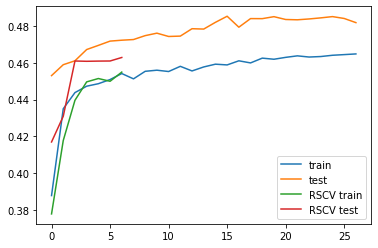

In [148]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'], label = "train")
plt.plot(history2.history['val_accuracy'], label = "test")
plt.plot(history.history['accuracy'], label = "RSCV train")
plt.plot(history.history['val_accuracy'], label = "RSCV test")


plt.legend()
plt.show()

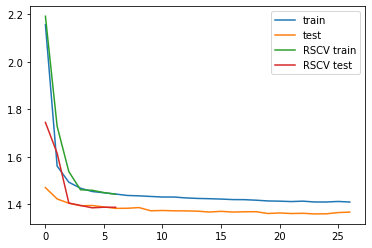

In [149]:
plt.plot(history2.history['loss'], label = "train")
plt.plot(history2.history['val_loss'], label = "test")
plt.plot(history.history['loss'], label = "RSCV train")
plt.plot(history.history['val_loss'], label = "RSCV test")


plt.legend()
plt.show()